
# ARIMA
ARIMA : AutoRegressive Integrated Moving Average. Linear Regression.

    AR: LAGS. Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations. Predictor.
    I: CONSTANT. Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
    MA: ERRORS. Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

### Parameters

    p: The number of lag observations included in the model, also called the lag order (order of AR).
    d: The number of times that the raw observations are differenced, also called the degree of differencing.
    q: The size of the moving average window, also called the order of moving average (MA).

### Function
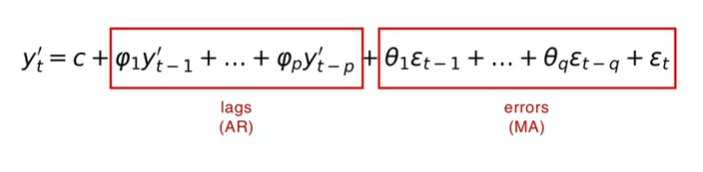
    
    
### When to use ARIMA(Assumption)?

    1. The time series is stationary 
    2. The target variable is reverting
    
### Why ARIMA(advantage)?

### Why not ARIMA(disadvantage)?
    
    1. Linear, so must have no Multicollinearity to ensure stationary
    2. does not support seasonal data -> if it has seasonal, use SARIMA


### Reference
https://www.youtube.com/watch?v=gqryqIlvEoM&ab_channel=DecisionForest

https://anindya-saha.github.io/blog/machine-learning-with-python/kaggle-bike-sharing-demand/kaggle-bike-sharing-demand.html

https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

https://www.kaggle.com/prashant111/arima-model-for-time-series-forecasting

https://medium.datadriveninvestor.com/time-series-prediction-using-sarimax-a6604f258c56

-------------------
-------------------


# Data

    Close: "Closing price" generally refers to the last price at which a stock trades during a regular trading session. A number of markets offer after-hours trading and some financial publications and market data vendors use the last trade in these after-hours markets as the closing price for the day
    


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [3]:
data = pd.read_csv('AirPassengers.csv',index_col='Month', parse_dates=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [4]:
data = pd.read_csv('FB_stock_history.csv',index_col='Date', parse_dates=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2359 entries, 2012-05-18 to 2021-10-01
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2359 non-null   float64
 1   High          2359 non-null   float64
 2   Low           2359 non-null   float64
 3   Close         2359 non-null   float64
 4   Volume        2359 non-null   int64  
 5   Dividends     2359 non-null   int64  
 6   Stock Splits  2359 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 147.4 KB


In [5]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2359.000000,2359.000000,2359.000000,2359.000000,2.359000e+03,2359.0,2359.0
mean,139.606969,141.234324,137.958605,139.656876,3.095630e+07,0.0,0.0
std,84.490691,85.465048,83.566847,84.565640,2.778137e+07,0.0,0.0
min,18.080000,18.270000,17.549999,17.730000,5.913100e+06,0.0,0.0
25%,74.935001,75.565002,74.020000,74.855000,1.564190e+07,0.0,0.0
50%,130.979996,132.259995,129.770004,131.050003,2.220590e+07,0.0,0.0
75%,184.914993,186.830002,183.419998,185.345001,3.597605e+07,0.0,0.0
max,381.679993,384.329987,378.809998,382.179993,5.735764e+08,0.0,0.0


In [6]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400,0,0
2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700,0,0
2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600,0,0
2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000,0,0
2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200,0,0


In [7]:
data.isna().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

## Train Test Split

In [8]:
train_row = round(0.8 * 2359,0)
train_row

1887.0

In [9]:
test_row = len(data) - train_row
test_row

472.0

In [10]:
data_train = data.iloc[:1887,:]
data_test = data.iloc[1887:,:]
data_train

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400,0,0
2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700,0,0
2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600,0,0
2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000,0,0
2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200,0,0
...,...,...,...,...,...,...,...
2019-11-11,189.929993,190.080002,188.539993,189.610001,8631200,0,0
2019-11-12,190.000000,195.059998,189.740005,194.470001,17615500,0,0
2019-11-13,194.699997,195.699997,192.740005,193.190002,10860700,0,0


## Check stationary

We'll use Augumented Dickey Fuller(ADF) test to check if the passengers is stationary.

The null hypothesis of the ADF test is the time series is non-stationary, so, if p-value of the test is less than the significance level 0.05 then we can reject the null hypothesis and have evidence to indicate that the time series is stationary.

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
result = adfuller(data_train.Close)
print(f'ADF Statistics: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistics: -0.6488888824939453
p-value: 0.859548184900919


Since the p-value > 0.05, we do not reject the null hypothesis and we need to find the order of differencing. So d is not 0.

## Autocorrelation Function

## Part: d
### Original

In [13]:
import matplotlib.pyplot as plt

In [14]:
from statsmodels.graphics.tsaplots import plot_acf

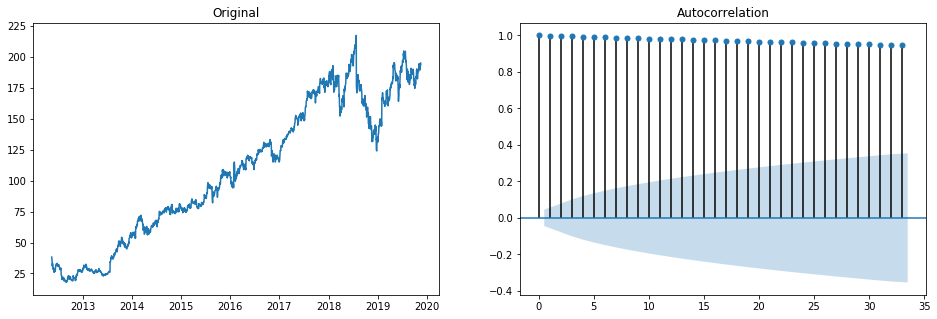

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,5))

ax1.plot(data_train.Close)
ax1.set_title("Original")
plot_acf(data_train.Close, ax=ax2);

### Diffence 1

In [16]:
diff = data_train.Close.diff().dropna()
diff

Date
2012-05-21   -4.200001
2012-05-22   -3.029999
2012-05-23    1.000000
2012-05-24    1.029999
2012-05-25   -1.119999
                ...   
2019-11-11   -1.229996
2019-11-12    4.860001
2019-11-13   -1.279999
2019-11-14   -0.040009
2019-11-15    1.950012
Name: Close, Length: 1886, dtype: float64

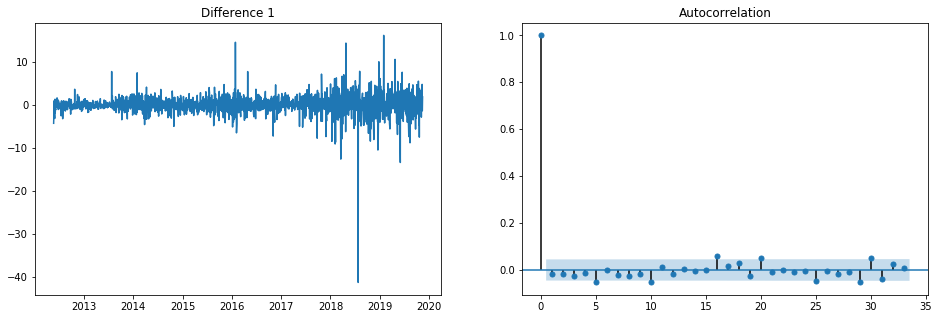

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,5))

ax1.plot(diff)
ax1.set_title("Difference 1")
plot_acf(diff, ax=ax2);

As we can see the autocorrelation distribute around 0, it is a good sign. Let's see if we difference twice would it be better.

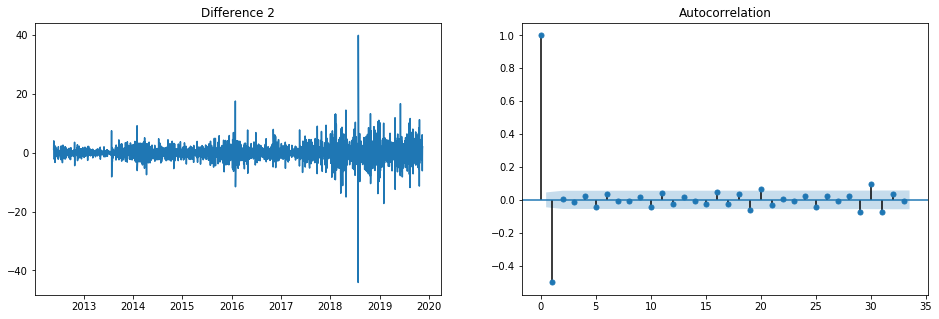

In [18]:
diff2 = data_train.Close.diff().diff().dropna()
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,5))

ax1.plot(diff2)
ax1.set_title("Difference 2")
plot_acf(diff2, ax=ax2);

When we difference twice, we can see the autocorrelation becomes larger, so we migh have over difference. Since the autocorrelation is very close to 0 when we difference once, we stop here. d = 1.

## Part P

We find out the required number of AR terms by inspecting the Partial Autocorrelation(PACF) plot. The partial autocorrelation represents the correlation between the series and its lags.

In [19]:
from statsmodels.graphics.tsaplots import plot_pacf

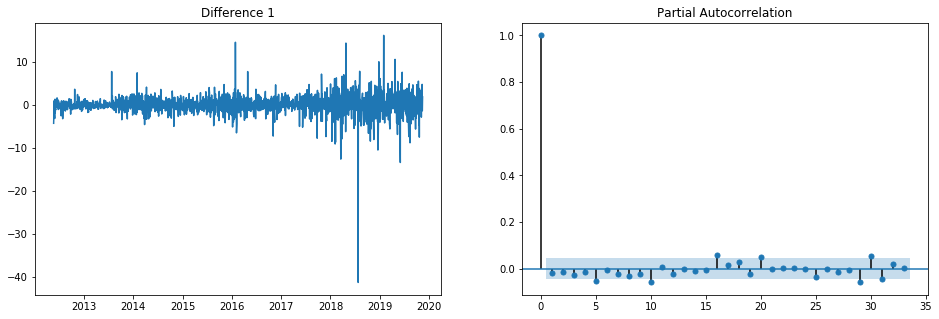

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,5))

ax1.plot(diff)
ax1.set_title("Difference 1")
plot_pacf(diff, ax=ax2);

We can observe that the PACF lag 5, 10, 16, 20 and 30 are above the significance line. We can use either of these number for P. Let's pick a small number 5.

## Part q
q refers to the number of lagged forcast errors that should go into the ARIMA model.

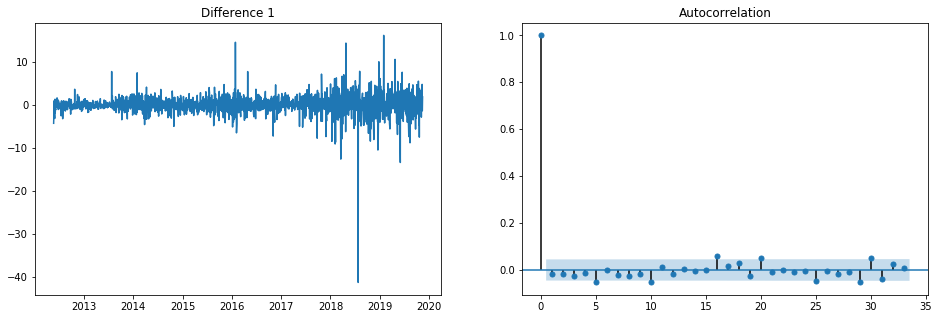

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,5))

ax1.plot(diff)
ax1.set_title("Difference 1")
plot_acf(diff, ax=ax2);

We can see there are 4 autocorrelation beyond the significance level. We may set q  = 4 be suitable.

## Fit the ARIMA model

In [22]:
from statsmodels.tsa.arima_model import ARIMA

In [23]:
model = ARIMA(data_train.Close, order=(5,1,4)) #p, d, q
result = model.fit(disp=0)

C:\Users\82124\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\82124\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [24]:
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1886
Model:                 ARIMA(5, 1, 4)   Log Likelihood               -4235.189
Method:                       css-mle   S.D. of innovations              2.285
Date:                Thu, 07 Oct 2021   AIC                           8492.377
Time:                        22:48:42   BIC                           8553.342
Sample:                             1   HQIC                          8514.829
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0839      0.041      2.071      0.038       0.005       0.163
ar.L1.D.Close     0.2017      0.125      1.620      0.105      -0.042       0.446
ar.L2.D.Close    -0.0156      0.177     

The coefficients are the weights of the respective terms.

The coefficient of the ar.L2.D.Close  is close to zero and the P-Value in ‘P>|z|’ column is highly insignificant. It should ideally be less than 0.05 for the respective X to be significant.

We can see that ma.L2.D.Close also have a coef close to zero and insignificant P-value. We can remove it from the model.

So, we will rebuild the model without the MA2 term.

In [25]:
model = ARIMA(data_train.Close, order=(3,1,3))
result = model.fit(disp=0)
print(result.summary())

C:\Users\82124\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\82124\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1886
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -4233.079
Method:                       css-mle   S.D. of innovations              2.283
Date:                Thu, 07 Oct 2021   AIC                           8482.158
Time:                        22:48:45   BIC                           8526.496
Sample:                             1   HQIC                          8498.486
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0835      0.045      1.857      0.063      -0.005       0.172
ar.L1.D.Close     0.8209      0.057     14.413      0.000       0.709       0.933
ar.L2.D.Close     0.9195      0.016     

All the parameters are significant. Check the residuals

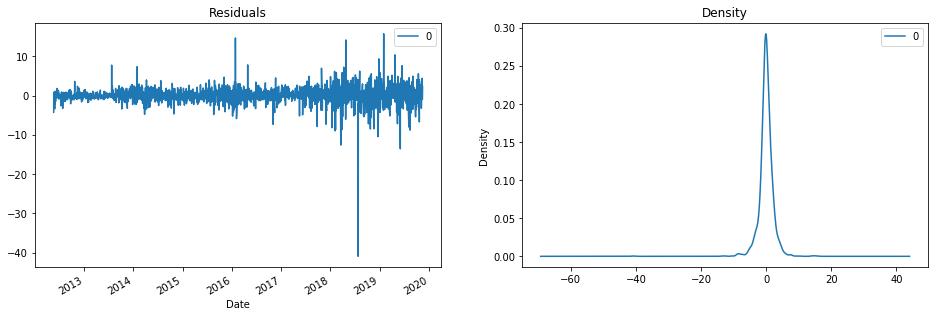

In [26]:
residuals = pd.DataFrame(result.resid)
fig, ax = plt.subplots(1,2,  figsize = (16,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

Plot the acual VS fitted

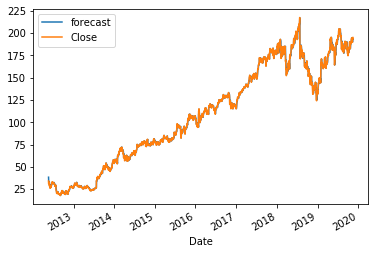

In [27]:
result.plot_predict(dynamic=False)
plt.show()

When we set dynamic=False the in-sample lagged values are used for prediction. That is, the model gets trained up until the previous value to make the next prediction. This can make the fitted forecast and actuals look artificially good. Lets forecast the test data.

## Forecast

In [28]:
model = ARIMA(data_train.Close, order=(3,1,3))
result = model.fit(disp=1)

C:\Users\82124\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\82124\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [29]:
fc, se, conf = result.forecast(472)

In [30]:
# 95% confidence integral
fc_series = pd.Series(fc, index=data_test.index)
# Lower bound
lower_series = pd.Series(conf[:, 0], index=data_test.index)
# Upper bound
upper_series = pd.Series(conf[:, 1], index=data_test.index)

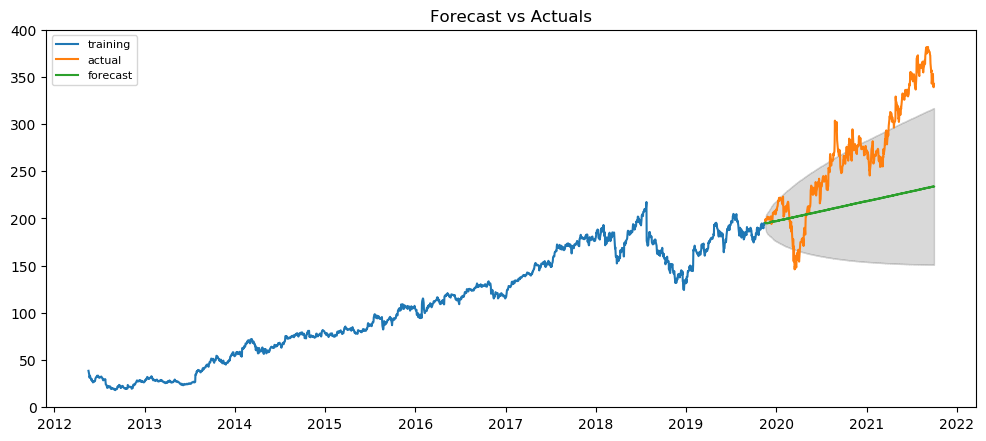

In [31]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(data_train['Close'], label='training')
plt.plot(data_test['Close'], label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

I dont think ARIMA is the best for forcasting stock since it is not very accurate by using only the close price. The market is a lot more complicated than a linear model, although ARIMA can give us a roughly trend. We can check the performance of the model.

Our accuracy metrics includes: 
1. Mean Absolute Percentage Error (MAPE)
2. Mean Error (ME)
3. Mean Absolute Error (MAE)
4. Mean Percentage Error (MPE)
5. Root Mean Squared Error (RMSE)
6. Lag 1 Autocorrelation of Error (ACF1)
7. Correlation between the Actual and the Forecast (corr)
8. Min-Max Error (minmax)

In [41]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})
forecast_accuracy(fc_series, data_test['Close'])

{'mape': 0.19663851594121526,
 'me': -51.22428071282168,
 'mae': 57.030143288006194,
 'mpe': -0.16126734999516232,
 'rmse': 69.41951410581173,
 'corr': 0.9274496219794515,
 'minmax': 0.19330739594023694}

0.1966 mape means that the model can describe 80% accurate in predicting the next 472 observations.

# Auto ARIMA (Find the best model)
auto_arima() uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.

In [37]:
model = pm.auto_arima(data_train['Close'], start_p=1, start_q=1, test='adf', max_p=10, max_q=10, m=1, d=None,seasonal=False,   
                      start_P=0, D=0, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8487.220, Time=1.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8491.430, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8492.746, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8492.724, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8491.904, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8488.868, Time=0.79 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8488.884, Time=0.86 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8494.217, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8494.293, Time=0.20 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8491.127, Time=0.94 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=8489.347, Time=0.21 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 4.577 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1

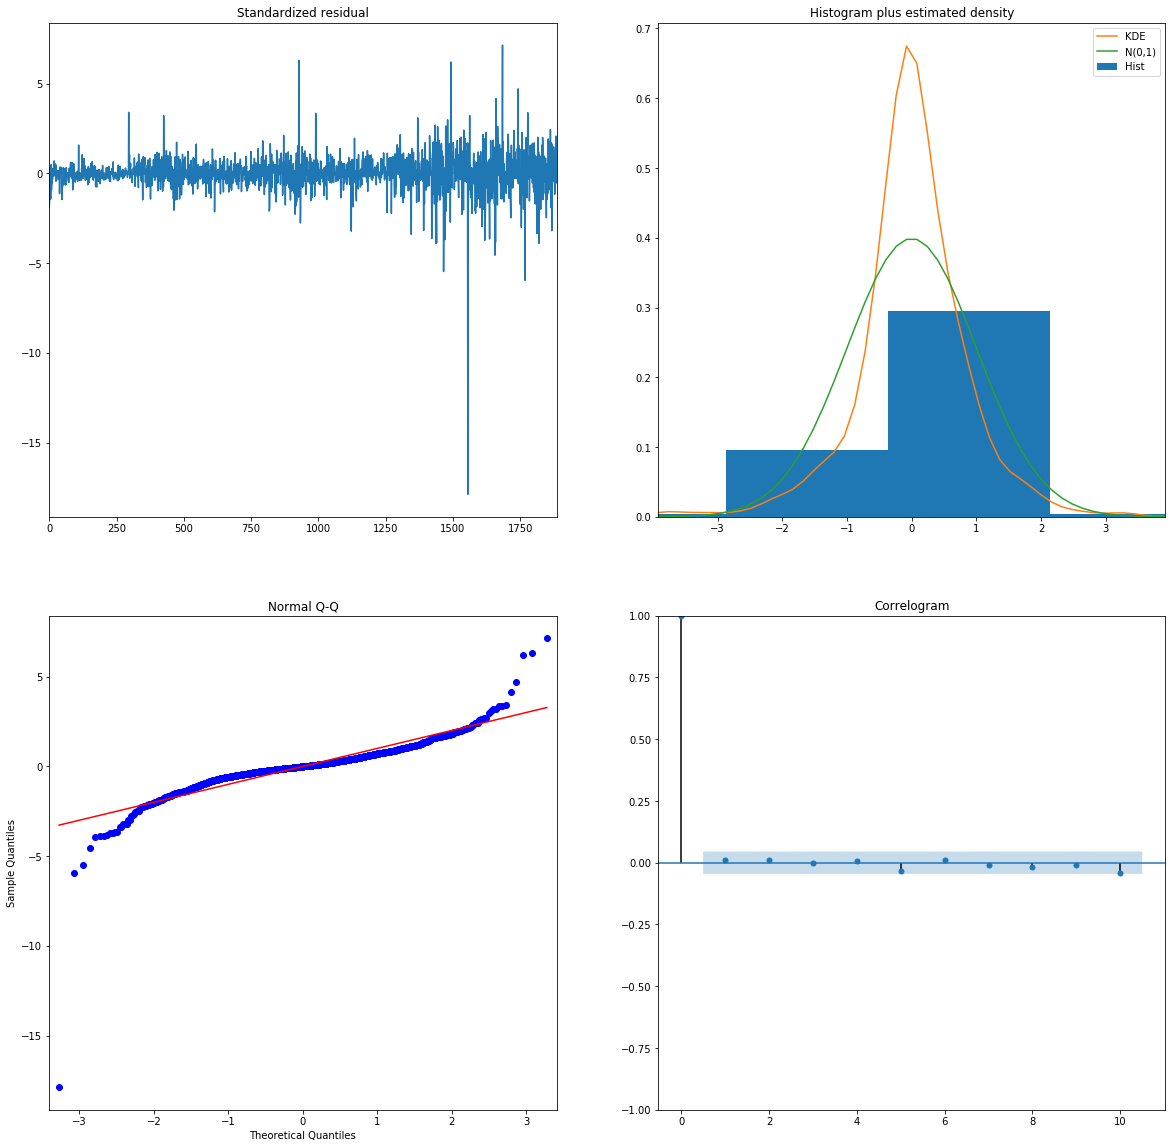

In [40]:
model.plot_diagnostics(figsize=(20,20))
plt.show()

The residual fluctuate around 0. There is an outlier which has over -15 residual. The KDE shows a normal distribution. The residual is normal distributed because most of the residual follow the line on Normal QQ plot. There are some outliers that are not along with the line. The Correlogram, (or ACF plot) shows the residual errors are not autocorrelated. The ACF plot would imply that there is some pattern in the residual errors which are not explained in the model.